In [4]:
import scipy.stats as stats  
import math
from collections import Counter

data = "D; D; E; C; D; A; D; D; F; A; B; A; A; A; D; A; C; E; D; E; A; D; D; D; B; E; D; C; D; E; D; D; D; C; D; D; NA; C; C; D; D; A; NA; B; A; D; A; D; E; D; D; D; E; A; D; C; D; A; D; NA; D; D; E; D; D; D; E; D; D; A; C; D; B; E; C; A; D; E; D; NA; D; A; E; NA; F; D; D; E; B; A; E; A; A; D; E; A; F; D; E; F; C; NA; D; B; D; A; F; D; C; D; E; E; E; B; B; F; D; E; A; D; A; NA; F; B; E; D; F; NA; D; D; D; E; C; D; F; D; B; NA; D; E; A; B; E; D; E; C; B; A; D; C; A; D; F; C; D; D; B; NA; A; D; E; E; D; F; B; A; A; F; B; C; A; E; C; NA; A; NA; A; F; E; NA; NA; D; F; A; E; E; F; A; A; D; A; D; F; NA; NA; D; F; F; D; D; A; F; B; D; C; E; NA; D; D; A; B; C; E; E; NA; A; A; B; D; E; D; D; A; C; E; D; C; D; D; C; B; E; C; A; A; E; D; D; E; A; D; D; C; E; NA; C; E; A; E; B; A; C; C; E; B; E; D; D; D; E; F; D; D; D; NA; E; A; B; D; E; D; E; D; D; D; C; A; B; NA; C; NA; A; F; A; C; D; D; B; C; C; A; D; A; NA; D; C; D; D; NA; F"
data = data.split("; ")
cleaned_data = [x for x in data if x != 'NA']

    
# 1. Объем очищенной выборки
n = len(cleaned_data)
print(f"1. Объем очищенной от 'NA' выборки: {n}")
print("-" * 50)

# 2. Количество различных вариантов ответов
unique_answers = sorted(set(cleaned_data))
k = len(unique_answers)
print(f"2. Количество различных вариантов ответов: {k}")
print(f" Варианты: {unique_answers}")
print("-" * 50)

# 3. Количество респондентов с ответом "А"
count_A = cleaned_data.count('A')
print(f"3. Количество ответов 'A': {count_A}")
print("-" * 50)

# 4. Доля ответов "IB" (нормализованных к "B")
count_B = cleaned_data.count('B')
proportion_B = count_B / n
print(f"4. Доля ответов 'B' (нормализованных из 'IB'): {proportion_B}")
print(f" (Абсолютное количество B: {count_B})")
print("-" * 50)

# 5-6. 99% доверительный интервал для доли ответов "B"
p = count_B / n # выборочная доля
z = stats.norm.ppf(0.995) # z-критерий для 99% ДИ
se = math.sqrt(p * (1 - p) / n) # стандартная ошибка

ci_lower = max(0, p - z * se) # левая граница (не меньше 0)
ci_upper = min(1, p + z * se) # правая граница (не больше 1)

print(f"5. Левая граница 99% ДИ для доли 'B': {ci_lower}")
print(f"6. Правая граница 99% ДИ для доли 'B': {ci_upper}")
print("-" * 50)
# Подсчет частот всех ответов
freq_dict = Counter(cleaned_data)
freq_dict = dict(sorted(freq_dict.items())) # сортируем по ключам

print("Распределение ответов:")
for answer, count in freq_dict.items():
    print(f" {answer}: {count} ({(count/n*100):.1f}%)")
    print("-" * 50)

# Проверка гипотезы о равновероятности
observed = list(freq_dict.values())
k_categories = len(observed)
expected_count = n / k_categories # ожидаемая частота при равновероятности
expected = [expected_count] * k_categories

# Вычисляем статистику χ²
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# 7. Степени свободы
df = k_categories - 1
print(f"7. Количество степеней свободы: {df}")

# 8. Критическое значение χ²
alpha = 0.1
critical_value = stats.chi2.ppf(1 - alpha, df)
print(f"8. Критическое значение χ² (α=0.1): {critical_value}")

# 9. Наблюдаемое значение χ²
print(f"9. Наблюдаемое значение χ²: {chi2_stat}")

# 10. Проверка гипотезы
reject_null = chi2_stat > critical_value
print(f"10. Основания отвергнуть гипотезу о равновероятности?")
print(f" Ответ: {'1 (ДА)' if reject_null else '0 (НЕТ)'}")
print(f" p-значение: {p_value:.6f}")
print("-" * 50)

# Подсчет частот всех ответов
freq_dict = Counter(cleaned_data)
freq_dict = dict(sorted(freq_dict.items())) # сортируем по ключам

print("Распределение ответов:")
for answer, count in freq_dict.items():
    print(f" {answer}: {count} ({(count/n*100):.1f}%)")
    print("-" * 50)

# Проверка гипотезы о равновероятности
observed = list(freq_dict.values())
k_categories = len(observed)
expected_count = n / k_categories # ожидаемая частота при равновероятности
expected = [expected_count] * k_categories

# Вычисляем статистику χ²
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# 7. Степени свободы
df = k_categories - 1
print(f"7. Количество степеней свободы: {df}")

# 8. Критическое значение χ²
alpha = 0.1
critical_value = stats.chi2.ppf(1 - alpha, df)
print(f"8. Критическое значение χ² (α=0.1): {critical_value:.4f}")

# 9. Наблюдаемое значение χ²
print(f"9. Наблюдаемое значение χ²: {chi2_stat:.4f}")

# 10. Проверка гипотезы
reject_null = chi2_stat > critical_value
print(f"10. Основания отвергнуть гипотезу о равновероятности?")
print(f" Ответ: {'1 (ДА)' if reject_null else '0 (НЕТ)'}")
print(f" p-значение: {p_value:.6f}")
print("-" * 50)

1. Объем очищенной от 'NA' выборки: 276
--------------------------------------------------
2. Количество различных вариантов ответов: 6
 Варианты: ['A', 'B', 'C', 'D', 'E', 'F']
--------------------------------------------------
3. Количество ответов 'A': 51
--------------------------------------------------
4. Доля ответов 'B' (нормализованных из 'IB'): 0.08695652173913043
 (Абсолютное количество B: 24)
--------------------------------------------------
5. Левая граница 99% ДИ для доли 'B': 0.043268804994492906
6. Правая граница 99% ДИ для доли 'B': 0.13064423848376797
--------------------------------------------------
Распределение ответов:
 A: 51 (18.5%)
--------------------------------------------------
 B: 24 (8.7%)
--------------------------------------------------
 C: 33 (12.0%)
--------------------------------------------------
 D: 98 (35.5%)
--------------------------------------------------
 E: 48 (17.4%)
--------------------------------------------------
 F: 22 (8.0%)
------

In [7]:
# 7. Степени свободы
df = k_categories - 1
print(f"7. Количество степеней свободы: {df}")

# 8. Критическое значение χ²
alpha = 0.1
critical_value = stats.chi2.ppf(1 - alpha, df)
print(f"8. Критическое значение χ² (α=0.1): {critical_value}")

# 9. Наблюдаемое значение χ²
print(f"9. Наблюдаемое значение χ²: {chi2_stat}")

# 10. Проверка гипотезы
reject_null = chi2_stat > critical_value
print(f"10. Основания отвергнуть гипотезу о равновероятности?")
print(f" Ответ: {'1 (ДА)' if reject_null else '0 (НЕТ)'}")
print(f" p-значение: {p_value}")
print("-" * 50)

7. Количество степеней свободы: 5
8. Критическое значение χ² (α=0.1): 9.236356899781123
9. Наблюдаемое значение χ²: 86.13043478260869
10. Основания отвергнуть гипотезу о равновероятности?
 Ответ: 1 (ДА)
 p-значение: 4.3611864559592125e-17
--------------------------------------------------


320 272
3
272
48
0.2867647058823529
0.35739839504645976
0.21613101671824608
Не отвергаем H0: распределение может быть равновероятным 0
5.991464547107979
2
3.2058823529411766


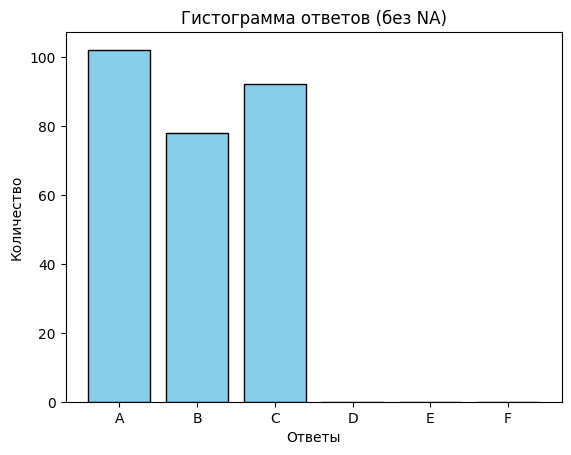

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statistics as stats
import scipy.stats as sts

arr = 'No; No; Unkn; Yes; No; Yes; Unkn; No; Unkn; NA; Yes; NA; NA; No; No; No; Unkn; NA; No; Yes; No; Unkn; Yes; Yes; No; Unkn; Yes; Yes; NA; Unkn; Yes; No; Unkn; Unkn; Yes; Unkn; Yes; Unkn; Yes; No; Yes; Unkn; Unkn; Yes; Unkn; No; No; Yes; No; Yes; No; Yes; Unkn; No; No; Unkn; NA; NA; Yes; Yes; NA; No; Yes; No; NA; No; No; Yes; Yes; Unkn; No; Yes; No; No; NA; No; NA; No; No; NA; Unkn; No; Unkn; Unkn; NA; No; No; Yes; Unkn; NA; Yes; Yes; Unkn; NA; No; No; No; NA; Yes; Unkn; NA; No; No; Yes; Yes; NA; NA; No; Yes; No; No; No; Unkn; No; NA; NA; Yes; NA; Yes; Yes; Yes; Yes; Yes; Yes; No; No; No; No; Yes; Unkn; No; Yes; Unkn; NA; No; No; Unkn; No; No; Yes; Yes; NA; Unkn; Unkn; Yes; NA; No; Unkn; Unkn; Unkn; Unkn; Yes; NA; Unkn; NA; No; No; Yes; No; Unkn; Unkn; NA; No; Unkn; Unkn; Unkn; Unkn; No; Yes; No; Yes; NA; Yes; NA; Unkn; No; Yes; Unkn; No; No; Yes; Unkn; Unkn; No; Yes; Unkn; Yes; No; Yes; NA; Yes; No; No; Yes; NA; Yes; Unkn; Yes; No; No; Yes; NA; No; Unkn; Unkn; No; Yes; No; Yes; No; No; Yes; Unkn; No; Yes; Yes; Unkn; Yes; Unkn; Unkn; Unkn; Yes; Yes; No; Yes; Yes; Yes; Unkn; No; Unkn; No; No; No; Yes; Yes; NA; Yes; No; Unkn; Unkn; No; NA; No; NA; Yes; Yes; No; No; No; Yes; Unkn; NA; NA; Unkn; NA; Unkn; No; Yes; No; Yes; Unkn; Unkn; No; Unkn; Yes; No; Unkn; No; Unkn; Unkn; Unkn; Unkn; Yes; Unkn; Yes; Yes; No; Yes; Yes; No; Yes; No; No; Yes; NA; Unkn; No; Unkn; NA; NA; Yes; Yes; Unkn; No; NA; Yes; No; Yes; No; No; NA; Yes; Yes; NA; No; Unkn; Unkn; NA; Yes; No; No; No; No; Yes; Unkn; Unkn; NA; Unkn; NA; Unkn'
data = arr.split('; ')
clean_data = [x for x in data if x != "NA"]
print(len(data), len(clean_data))

# 1 количество различных вариантов ответов респондентов
categories, count, = np.unique(clean_data, return_counts=True)
print(len(categories))

# 2 объем очищенной от "NA" выборки
print(sum(count))

# 3 объем удаленных "NA" из выборки
print(len(data) - len(clean_data))

# 4 доля ответов "Unkn" в очищенной выборке
print(clean_data.count('Unkn')/len(clean_data))

# 5 правая граница 0.99-доверительного интервала для истинной доли ответов  "Unkn"
n = len(clean_data)      # объем очищенной выборки
x = clean_data.count('Unkn')       # количество B

p_hat = x / n
z = stats.NormalDist().inv_cdf(0.995)   # для 0.99-ДИ

right = p_hat + z * math.sqrt(p_hat * (1 - p_hat) / n)
print(right)


# 6 левую границу 0.99-доверительного интервала для истинной доли ответов  "Unkn"
left = p_hat - z * math.sqrt(p_hat * (1 - p_hat) / n)
print(left)



# ----
# ожидаемые частоты при равновероятном распределении
expected = [n / len(categories)] * len(categories)

# расчет статистики хи-квадрат
chi2_stat = sum((o - e)**2 / e for o, e in zip(count, expected))

# степени свободы
df = len(categories) - 1

# p-значение
p_value = 1 - sts.chi2.cdf(chi2_stat, df)

# проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отвергаем H0: распределение не равновероятно 1")
else:
    print("Не отвергаем H0: распределение может быть равновероятным 0")
# ----


# 7 критическое значение статистики хи-квадрат
chi2_crit = sts.chi2.ppf(1 - alpha, df)
print(chi2_crit)

# 8 количество степеней свободы 
df = len(categories) - 1
print(df)

# 9 наблюдаемое значение хи-квадрат
chi2_stat = sum((o - e)**2 / e for o, e in zip(count, expected))
print(chi2_stat)

plt.hist(clean_data, bins=range(7), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(6), ["A","B","C","D","E","F"])
plt.xlabel("Ответы")
plt.ylabel("Количество")
plt.title("Гистограмма ответов (без NA)")
plt.show()

300 278
1. Кол-во пропущенных значений: 22
2. Объем очищенной выборки: 278
3. Среднее значение: 153.43446492805757
4. Стандартное отклонение: 35.154274472137075
5. Несмещенная дисперсия: 1235.8230136623483
6. Q1: 134.3025
7. Q3: 169.33749999999998
8. Медиана: 152.305
9. Максимум: 393.46875
10. Минимум: 12.7862499999999
11. Размах выборки: 380.6825000000001
12. Эксцесс: 13.7077204292954
13. Коэффициент асимметрии: 1.9738571877845377
14. Ошибка выборки: 2.1084132716252006
15. Левый предел 0.99 CI E(X): 149.95479626647082
16. Правый предел 0.99 CI E(X): 156.9141335896443
17. Левый предел 0.99 CI Var(X): 1080.5018088182544
18. Правый предел 0.99 CI Var(X): 1429.594147397218
19. Выбросы ниже нормы: 81.75000000000006
20. Выбросы выше нормы: 221.88999999999993
Вариационный ряд (первые 10 значений): [ 12.78625  47.39375  80.87     92.47     93.27     93.89     93.98
  98.41     98.57    103.93   ]


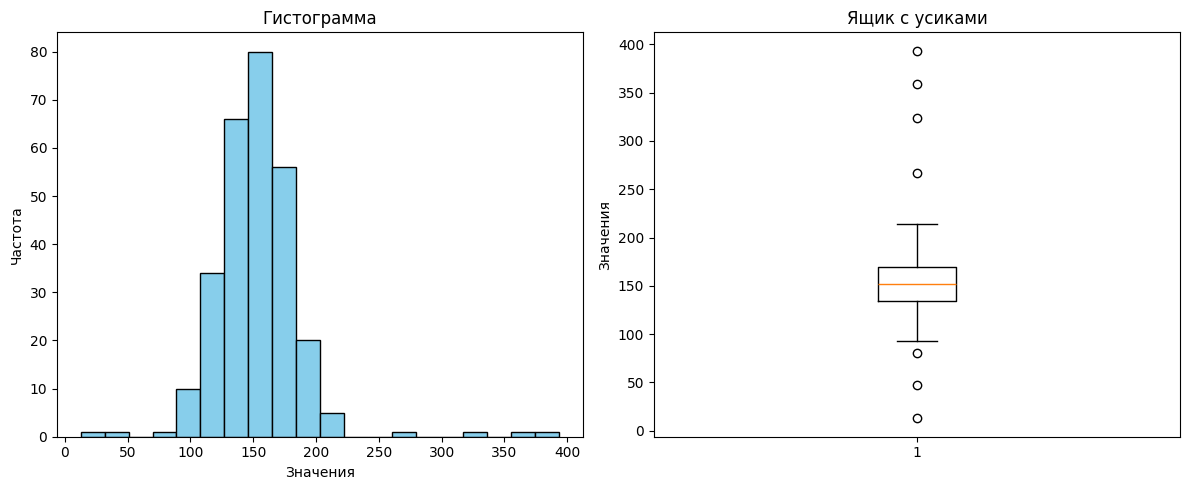

In [18]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
 

# 0. Введите данные выборки

data = "NA; 179.19; 161.59; 181.55; 185.45; 113.31; 168.3; 188.41; 144.79; 155.2; 178.76; 159.27; 166.17; 148.07; 142.1; NA; 188.03; 166.18; 104.9; 162.33; 158.72; 134.28; 267.0375; 127.17; 163.26; 138.11; 156.56; 141.79; 130.74; 176.45; 358.86125; 159.38; 393.46875; 181.04; 162.27; 160.62; 124.09; 122.96; 124.37; 199.01; 182.64; 127.23; NA; 141.93; 127.93; 144.42; NA; 150.99; 160.03; 98.41; 153.19; 173.47; 163.96; 135.41; 154.17; 111.69; 159.61; 109.07; 178.82; 132.11; 98.57; 151.67; 155.1; 12.7862499999999; 166.33; 143.83; 141.92; 153.37; 93.89; 114.14; 119.26; 170.03; 162.21; 127.19; 147.9; 133.79; 131.79; 324.25375; 155.5; 168.43; 188.05; 120.74; 164.95; 196.07; 130.75; 138.65; 116.73; 149.44; 121.24; 118.83; 154.97; 164.48; 108.98; 146.13; 143.06; 165.5; 152.12; NA; 166.39; 151.79; 159.52; 183.1; 162.3; 134.83; 149.03; 113.26; NA; 129.46; 147.52; 147.28; 159.51; NA; 150.45; NA; 167.4; 141.65; 178.06; 196.77; NA; 175.51; 134.5; 154.97; 127.33; 47.39375; 182.75; 192.53; 132.85; 182.63; 173.27; 184.49; 181.92; 162.32; 178.68; 174.3; 160.6; 151.55; 169.57; 139.15; 214.29; 135.16; 142.98; 166.9; 145.53; 104.63; 184.42; 177.95; 174.34; 160.37; 162.07; 140.02; 177.64; 131.38; 125.89; 156.85; 155.65; 160.97; 140.72; 148.24; 125.76; 180.04; NA; 143.38; 156.82; 143.53; 151.95; 159.1; 143.67; 142.33; 136.09; 143.44; 125.65; 165.57; 183.29; 140.71; 135.78; 169.57; 157.06; NA; 179.75; NA; 147.63; 174.17; 177.53; 124.68; 144.91; 105.22; 182.16; 144.62; 173.01; 136.85; 123.58; 124.92; 151.87; 126.9; 139.03; 157.48; 136.56; 206.38; 178.5; 131.76; 133.15; 154.79; 157.42; 152.76; 147.3; 168.55; 149.51; 157.38; 123.95; 130.66; 112.83; 193.72; 159.38; 158.59; 174.37; 148.99; 80.87; 189.15; 143.98; 127.5; 192.33; 175.83; 163.35; NA; NA; 152.49; NA; 139.79; 210.51; 131.02; 117.66; 120.43; NA; 157.17; 161.7; 139.7; 92.47; 160.39; 136.25; 109.63; NA; 166.27; 174.61; 153.28; 175.04; 190.77; 151.22; 127.88; 133.52; 143.78; 162.13; 175.43; NA; 154.16; 148.54; 133.32; 170.03; 123.58; 93.98; 135.1; 185.98; 124.78; 175.76; 125.06; 117.26; 93.27; 173.2; 119.38; NA; NA; 199.25; 170.46; 121.07; 139.17; 103.93; NA; 193.63; 160.47; 193.63; 204.78; 111.83; 150.96; 164.04; 128.98; 161.96; NA; 212.8; 179.41; 165.74; 111.85; 151.23; 194.82; 146.84; 165.06; 184.73; 147.82; 168.64; 134.37; 141.36; 139.65"
data = data.split('; ')
clean_data = [float(x) for x in data if x != "NA"]
print(len(data), len(clean_data))

# 1. Кол-во пропущенных значений

n_missing = len(data) - len(clean_data)
print("1. Кол-во пропущенных значений:", n_missing)
 

# 2. Очистка от NA и объем выборки

n = len(clean_data)
print("2. Объем очищенной выборки:", n)
 

# 3. Среднее значение

mean = np.mean(clean_data)
print("3. Среднее значение:", mean)
 

# 4. Стандартное отклонение (исправленное)

std = np.std(clean_data, ddof=1)
print("4. Стандартное отклонение:", std)
 

# 5. Несмещенная дисперсия

var = std**2
print("5. Несмещенная дисперсия:", var)
 

# 6. Первая квартиль

q1 = np.percentile(clean_data, 25)
print("6. Q1:", q1)
 

# 7. Третья квартиль

q3 = np.percentile(clean_data, 75)
print("7. Q3:", q3)

# 8. Медиана

median = np.median(clean_data)
print("8. Медиана:", median)
 

# 9. Максимум

data_max = np.max(clean_data)
print("9. Максимум:", data_max)
 

# 10. Минимум

data_min = np.min(clean_data)
print("10. Минимум:", data_min)
 

# 11. Размах выборки

range_ = data_max - data_min
print("11. Размах выборки:", range_)

# # квартильный размах 
# range_ = q3 - q1
# print("11. Размах выборки:", range_)
 

# 12. Эксцесс

kurt = stats.kurtosis(clean_data, fisher=True, bias=False)
print("12. Эксцесс:", kurt)
 

# 13. Коэффициент асимметрии

skew = stats.skew(clean_data)
print("13. Коэффициент асимметрии:", skew)
 

# 14. Ошибка выборки

stderr = std / np.sqrt(n)
print("14. Ошибка выборки:", stderr)
 

# 15-16. 0.99 CI для E(X)

alpha = 0.1
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_mean = (mean - t_crit*stderr, mean + t_crit*stderr)
print("15. Левый предел 0.99 CI E(X):", ci_mean[0])
print("16. Правый предел 0.99 CI E(X):", ci_mean[1])
 

# 17-18. 0.99 CI для Var(X)

chi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
chi2_upper = stats.chi2.ppf(1-alpha/2, df=n-1)
ci_var = ((n-1)*var/chi2_upper, (n-1)*var/chi2_lower)
print("17. Левый предел 0.99 CI Var(X):", ci_var[0])
print("18. Правый предел 0.99 CI Var(X):", ci_var[1])
 

# 19-20. Выбросы по правилу 1.5*IQR

iqr = q3 - q1
lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr
outliers_low = np.sum(clean_data < lower_fence)
outliers_high = np.sum(clean_data > upper_fence)
print("19. Выбросы ниже нормы:", lower_fence)
print("20. Выбросы выше нормы:", upper_fence)
 

# 21. Вариационный ряд, гистограмма и "ящик с усиками"

# Вариационный ряд (отсортированные данные)
variation_series = np.sort(clean_data)
print("Вариационный ряд (первые 10 значений):", variation_series[:10])
 
# Гистограмма и ящик с усиками
plt.figure(figsize=(12,5))
 
plt.subplot(1,2,1)
plt.hist(clean_data, bins=20, color='skyblue', edgecolor='black')
plt.title("Гистограмма")
plt.xlabel("Значения")
plt.ylabel("Частота")
 
plt.subplot(1,2,2)
plt.boxplot(clean_data, vert=True)
plt.title("Ящик с усиками")
plt.ylabel("Значения")
 
plt.tight_layout()
plt.show()

In [19]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statistics as stats
import scipy.stats as sts

data_str = "(NA, 178.7); (183.5, 125.8); (145.4, 196.7); (178.8, 178); (155.6, 192.1); (198.1, 181.9); (217.3, 193.1); (163.7, 169.2); (159.2, 162); (175.9, 203.6); (167.5, 189.2); (NA, 143); (119.6, 163.9); (175.8, 194.6); (231.9, 151.5); (133.1, NA); (186.3, 200.2); (197.1, 208); (163, 206.6); (224.9, 185.5); (215.2, 158.4); (169.1, 210.9); (181.5, 209.4); (199.4, 137.3); (NA, 195.7); (181.7, 175); (NA, NA); (244, NA); (141, 212.3); (221.3, 187); (234.6, 207.7); (140.9, 193.2); (91.2, 217.2); (204.6, 219.7); (NA, 126.9); (179.2, 181.6); (209.5, 164.3); (NA, 150.5); (229.4, 160.9); (217.8, 206.3); (210.2, 158.3); (NA, NA); (169.8, 235.2); (179.3, 191.2); (151, 204.4); (180.9, 188); (NA, 155.1); (175.5, 202.4); (175.5, 203.4); (136.4, 172); (123.1, 197.9); (194.1, 161.2); (159.8, 210.2); (178.5, 180.2); (164.5, 156.7); (103, 209.3); (188.4, 194); (226.7, 126.6); (183, NA); (157.7, 209.3); (168.1, 199.4); (204.7, 181.4); (149.4, 203.5); (205.8, 148.7); (169.1, 223.8); (163.4, 178.9); (143.6, 165); (204, 194.7); (196.8, 148.7); (160.1, 183.5); (NA, 187.1); (235.3, 183.8); (NA, 183.3); (143, 185); (162.5, 181.7); (208.7, 165.8); (181, 198.2); (NA, 169.9); (181.8, 157.7); (163.7, 182.9); (231.3, 167.5); (218.7, 127.9); (173.6, 217.3); (175.4, 207.2); (201, 157.2); (180.8, 203.5); (192.5, 216); (202.8, 158.9); (182.7, 167.8); (172.2, 162); (203.3, 170.4); (183.7, NA); (NA, 210.7); (145.1, 185.9); (124.2, 189); (207.5, 161.9); (177.5, NA); (157.9, 166.1); (182.7, 148.8); (192.2, 155); (174.9, 185.6); (146.2, 162.6); (169.2, 167.7); (218.5, 197.6); (218.4, 201.8); (228.9, 224.3); (213.5, 191); (182.5, 173.4); (154.7, 183.8); (173.5, 141.4); (201.3, NA); (203.7, 181.8); (NA, NA); (210, 239.9); (178.1, NA); (218.2, 175.4); (167.3, 188.7); (99, 205.4); (126, 198.7); (147.5, 161.5); (162.1, 220.8); (195.4, 127.2); (171.8, 220.1); (158.9, 135.4); (226.9, 212.6); (163.9, 161.1); (NA, 182.5); (193.5, 172.8); (198.2, 153.4); (214.1, NA); (149.2, 158.7); (185, 227.5); (159.7, 223.2); (144, 178); (216.9, 151.1); (181.3, 206.5); (202.7, 173.9); (172.6, 139.6); (NA, 190.8); (174.3, 182.2); (205.4, NA); (201, 217.9); (NA, 196.7); (175.5, 161.4); (167.7, 190.4); (175.2, 202.2); (139.3, 193.1); (181, NA); (NA, NA); (172.8, 192.4)"

items = data_str.split(";")

A = []
B = []

for item in items:
    item = item.strip()
    item = item.strip("()")
    x_str, y_str = map(str.strip, item.split(","))
    
    x = x_str if x_str == "NA" else float(x_str)
    y = y_str if y_str == "NA" else float(y_str)
    
    A.append(x)
    B.append(y)
print(f"Количество наблюдений: {len(A)}")

for i in range(5):
    print(A[i], B[i])
# ----


# ----
clean_A = []
clean_B = []

for a, b in zip(A, B):
    if a != 'NA' and b != 'NA':  # оставляем только полные наблюдения
        clean_A.append(a)
        clean_B.append(b)

print(f"Количество полных наблюдений: {len(clean_A)}")
for i in range(5):
    print(clean_A[i], clean_B[i])
# -----

# 1 выборочный коэффициент корреляции Пирсона между X и Y

mean_X = sum(clean_A) / len(clean_A)
mean_Y = sum(clean_B) / len(clean_B)

# Числитель и знаменатель
numerator = sum((x - mean_X)*(y - mean_Y) for x, y in zip(clean_A, clean_B))
denominator = math.sqrt(sum((x - mean_X)**2 for x in clean_A) * sum((y - mean_Y)**2 for y in clean_B))

r = numerator / denominator

print("1. Выборочный коэффициент корреляции Пирсона между X и Y:", r)


# 2.1 Введите значение P-value в проверке гипотезы о равенстве средних значений показателей фирм при альтернативной гипотезе об их неравенстве (без каких-либо предположений о равенстве дисперсий)

t_stat, p_value = sts.ttest_ind(clean_A, clean_B, equal_var=False)

print("2.1 Значение P-value:", p_value)

# 2.2 На уровне значимости 0.1 можно ли утверждать, что средние значения показателей у фирм различны? Введите 1 - если да, и 0 - если нет
if p_value < 0.1:
    answer = 1
else:
    answer = 0
# ответ 1
print("2.2 Ответ:", answer)

# 3.1 Введите значение P-value в проверке гипотезы о равенстве дисперсий показателей двух фирм при альтернативной гипотезе о том, что дисперсия показателя больше у второй фирмы 

var_X = sum((x - sum(clean_A)/len(clean_A))**2 for x in clean_A) / (len(clean_A)-1)
var_Y = sum((y - sum(clean_B)/len(clean_B))**2 for y in clean_B) / (len(clean_B)-1)

F = var_Y / var_X  # т.к. альтернативная: sigma_Y^2 > sigma_X^2
df1 = len(clean_B) - 1
df2 = len(clean_A) - 1

# P-value для одностороннего F-теста
p_value = 1 - sts.f.cdf(F, df1, df2)

print("3.1 Значение P-value:", p_value)

# 3.2 На уровне значимости 0.01 можно ли утверждать, что о том, что дисперсия показателя больше у второй фирмы? Введите 1 - если да, и 0 - если нет
if p_value > 0.01:
    answer = 0
else:
    answer = 1
# ответ 1

print("3.2 Ответ:", answer)

Количество наблюдений: 150
NA 178.7
183.5 125.8
145.4 196.7
178.8 178.0
155.6 192.1
Количество полных наблюдений: 123
183.5 125.8
145.4 196.7
178.8 178.0
155.6 192.1
198.1 181.9
1. Выборочный коэффициент корреляции Пирсона между X и Y: -0.18691757264128026
2.1 Значение P-value: 0.23779896762777125
2.2 Ответ: 0
3.1 Значение P-value: 0.97181473408277
3.2 Ответ: 0
